In [1]:
# Use black formatter
# %load_ext lab_black

import numpy as np
from matplotlib import pyplot as plt
import itertools

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#### Carga del Dataset

In [2]:
# Cargamos los datos
X, y = load_digits(return_X_y=True)
clases = np.unique(y)

print(f"Formato del dataset: {X.shape}")
print(f"Formato de las etiquetas: {y.shape}")
print(f"Clases: {clases}")

Formato del dataset: (1797, 64)
Formato de las etiquetas: (1797,)
Clases: [0 1 2 3 4 5 6 7 8 9]


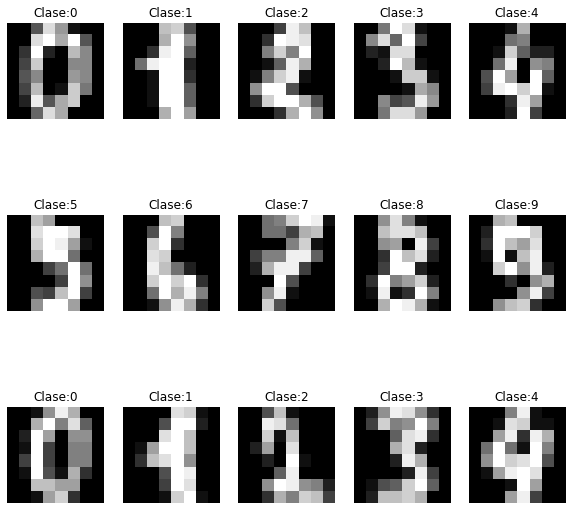

In [3]:
# Graficamos varias muestras

fig = plt.figure(figsize=(10, 10))
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap("gray"))
    ax.set_title("Clase:{y}".format(y=y[i]))
    plt.axis("off")
plt.show()

In [4]:
# Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
print(f"Formato del dataset de entrenamiento: {X_train.shape}")
print(f"Formato del dataset de prueba: {X_test.shape}")

Formato del dataset de entrenamiento: (1437, 64)
Formato del dataset de prueba: (360, 64)


In [5]:
# Escalamos las features
X_train_s = X_train / 16
X_test_s = X_test / 16

#### Calsifiación

In [6]:
# La clase LogisticRegression de sklearn no utiliza Gradient Descent como método de optimización, por lo tanto no es necesario pasarle el parámetros como learning rate, batch size o epochs. Se pueden optar por otros métodos de optimización como SAG (Stochastic Average Gradient) u otros pero estos tampoco requieren de parámetros.
logistic_regression = LogisticRegression(multi_class="multinomial", max_iter=1000)
logistic_regression.fit(X_train_s, y_train)

predictions = logistic_regression.predict(X_train_s)
print(f"Accuracy: {accuracy_score(y_train, predictions)}")

Accuracy: 0.9867780097425192


#### Predicciones y Matriz de Confusión con el set de test

In [7]:
predictions = logistic_regression.predict(X_test_s)
print(f"Accuracy: {accuracy_score(y_test, predictions)}")

Accuracy: 0.9555555555555556


In [8]:
def getConfusionMatrix(truth, prediction, c):
    conf_mtx = []

    for _ in range(c):
        conf_mtx.append([])
        for _ in range(c):
            conf_mtx[-1].append(0)

    for i in range(truth.shape[0]):
        conf_mtx[int(truth[i])][int(prediction[i])] += 1

    conf_mtx = np.array(conf_mtx)

    conf_mtx = conf_mtx.astype("float") / conf_mtx.sum(axis=1)[:, np.newaxis]

    return conf_mtx


def plotConfusionMatrix(conf_mtx, c):
    plt.figure(figsize=(15, 15))
    plt.imshow(conf_mtx, interpolation="nearest", cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()

    tick_marks = np.arange(c)
    plt.xticks(tick_marks, np.arange(c), rotation=45)
    plt.yticks(tick_marks, np.arange(c))

    fmt = ".2f"
    thresh = conf_mtx.max() / 2.0

    for i, j in itertools.product(range(conf_mtx.shape[0]), range(conf_mtx.shape[1])):
        plt.text(
            j,
            i,
            format(conf_mtx[i, j], fmt),
            horizontalalignment="center",
            color="white" if conf_mtx[i, j] > thresh else "black",
        )

        plt.tight_layout()
        plt.ylabel("True label")
        plt.xlabel("Predicted label")

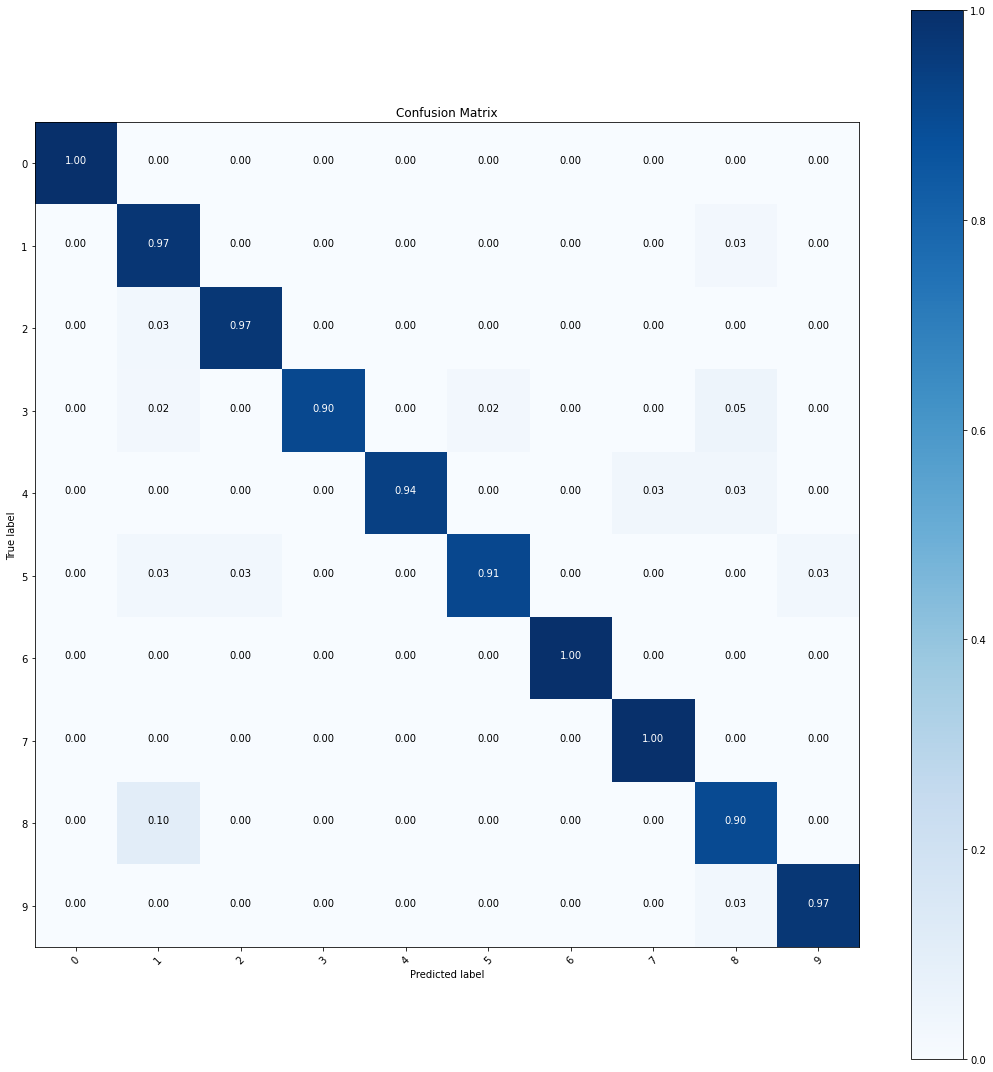

In [9]:
conf_mtx = getConfusionMatrix(y_test, predictions, 10)
plotConfusionMatrix(conf_mtx, 10)

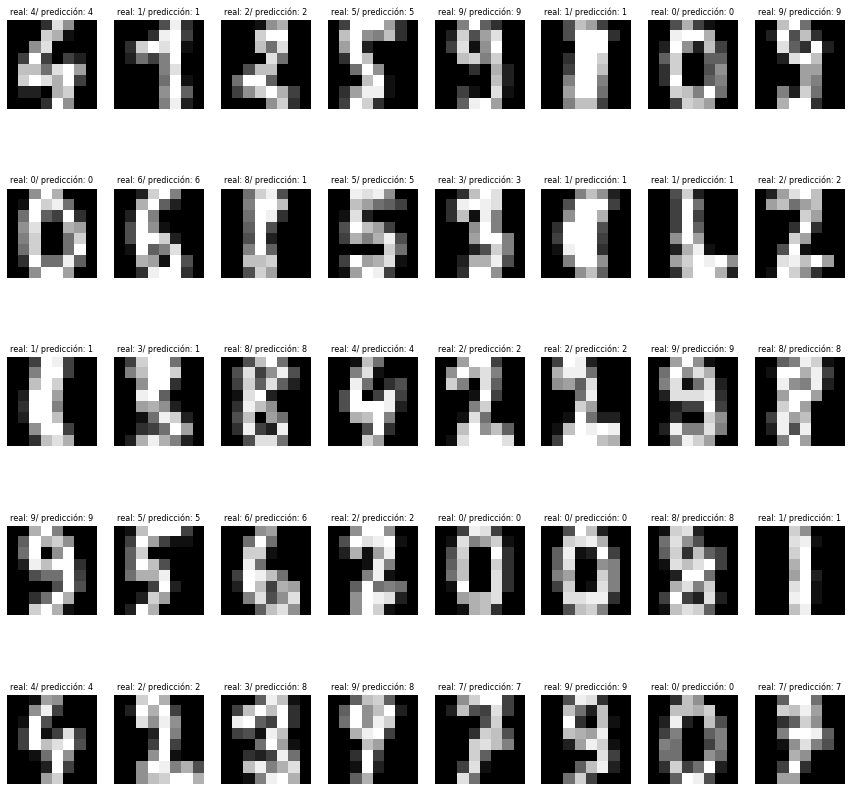

In [10]:
fig = plt.figure(figsize=(15, 15))

for i in range(40):
    ax = fig.add_subplot(5, 8, i + 1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap("gray"))
    ax.set_title(
        "real: {y}/ predicción: {y_hat}".format(y=y_test[i], y_hat=predictions[i]),
        fontsize=8,
    )
    plt.axis("off")